# Hyperparameter tuning

##### XGBoost model 
##### annotation result 0, 1, 2 (multiclass classification)
##### 결측치 mean()
##### age, gender 제외한 모든 항목 insert
#### **** 중요한 feature에 가중치 부여

In [129]:
import warnings
warnings.filterwarnings('ignore')

In [130]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('judge 제거_LCE.csv')

## Preprocessing
#### 1. annotation result = 3, Null drop

In [131]:
# annotation result = 0, 1, 2 만 남기고 확인 

null_annot = list(np.where(df['annotation_result'].isna() == True)[0])
df = df.drop(null_annot, axis = 'index')
df.index = range(len(df))

three_annot = list(np.where(df['annotation_result'] == 3)[0])
df = df.drop(three_annot, axis = 'index')
df.index = range(len(df))

df['annotation_result'].unique()

array([1., 0., 2.])

## X, y 정의 후 train, validation, test split

In [132]:
df = df.fillna(df.mean())
df

#최빈값
#df = df.fillna(df.mode().iloc[0])
#df

#중앙값
#df = df.fillna(df.median().iloc[0])
#df

,sample_date,hospital_number_id,hospital_number,annotation,annotation_result,age,gender,N817,T103,H103,...,L464,H129,C203,H102,C180,C159,L620,L621,L622,L623
0,2019.4.16,481,4,1,1.0,53.653046,NaN,358.419705,2359.84,6860.0,...,25.000000,325.450617,10.277011,4.66,102.298817,85.343612,1024.17,599.40,167.944515,131.844893
1,2019.4.16,395,23,1,1.0,53.653046,NaN,358.419705,1062.89,6770.0,...,19.600000,325.450617,10.277011,4.92,102.298817,85.343612,426.22,196.63,167.944515,131.844893
2,2019.11.7,395,23,1,1.0,53.653046,NaN,430.700000,1773.36,8210.0,...,10.100000,325.450617,4.900000,4.86,102.298817,78.000000,897.32,322.75,167.944515,131.844893
3,2017.11.1,397,24,1,0.0,53.653046,NaN,358.419705,2389.20,7240.0,...,13.022909,325.450617,10.277011,4.90,102.298817,85.343612,1134.87,346.43,167.944515,131.844893
4,2018.1.31,66,29,1,0.0,54.000000,F,358.419705,1716.81,6430.0,...,13.022909,325.450617,10.277011,3.99,102.298817,85.343612,743.38,326.19,167.944515,131.844893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,2022.8.17,385,1843,1,0.0,58.000000,F,40.000000,2910.57,6630.0,...,6.300000,356.000000,10.200000,4.30,93.000000,141.000000,2018.00,453.00,179.000000,86.000000
1780,2022.7.5,387,1846,1,1.0,57.000000,F,40.000000,1928.50,4750.0,...,15.100000,260.000000,10.700000,3.79,90.000000,106.000000,911.00,591.00,112.000000,197.000000
1781,2022.7.8,388,1847,1,0.0,49.000000,F,40.000000,1792.92,6690.0,...,11.000000,269.000000,16.800000,4.13,95.000000,22.000000,825.00,515.00,205.000000,138.000000
1782,2022.8.3,389,1852,1,2.0,51.000000,F,40.000000,1892.02,4940.0,...,20.100000,455.000000,9.800000,4.24,86.000000,42.000000,828.00,527.00,237.000000,198.000000


In [112]:
# Select all columns except certain columns
X = df.iloc[:,7:]
y = np.ravel(df.loc[:, ['annotation_result']])

from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Training set:  (1427, 72) (1427,)
Test set:  (357, 72) (357,)


## Scaler 

In [113]:
# 1. Standard Scaler
from sklearn.preprocessing import StandardScaler, RobustScaler, scale

# Initialize the StandardScaler
#standard_scaler = StandardScaler()
# Fit the scaler on the training data
#standard_scaler.fit(X_train)
# Scale the training, validation, and test data using the scaler
#X_train_standard = standard_scaler.transform(X_train)
#X_val_standard = standard_scaler.transform(X_val)
#X_test_standard = standard_scaler.transform(X_test)


# 2. Initialize the RobustScaler
robust_scaler = RobustScaler()
# Scale the training, validation, and test data using the scaler
X_train = robust_scaler.fit_transform(X_train)
X_test = robust_scaler.transform(X_test)

## XGBoost hyperparameter

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the hyperparameter grid to search
param_grid = {
    'learning_rate': np.arange(0.01, 0.2, 0.01),
    'max_depth': range(3, 10),
    'n_estimators': range(50, 200, 10),
    'min_child_weight': range(1, 6),
    'subsample': np.arange(0.5, 1, 0.05),
    'colsample_bytree': np.arange(0.5, 1, 0.05)
}

# Create an XGBoost classifier object
clf = XGBClassifier()

# Define the random search object
random_search = RandomizedSearchCV(
    clf, param_distributions=param_grid, n_iter=100,
    cv=5, scoring='f1', n_jobs=-1, verbose=1
)

# Fit the random search object to the data
random_search.fit(X, y)

# Print the best parameters and score
print('Best parameters:', random_search.best_params_)
print('Best score:', random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'subsample': 0.8500000000000003, 'n_estimators': 140, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.02, 'colsample_bytree': 0.9000000000000004}
Best score: nan


# Machine Learning Model

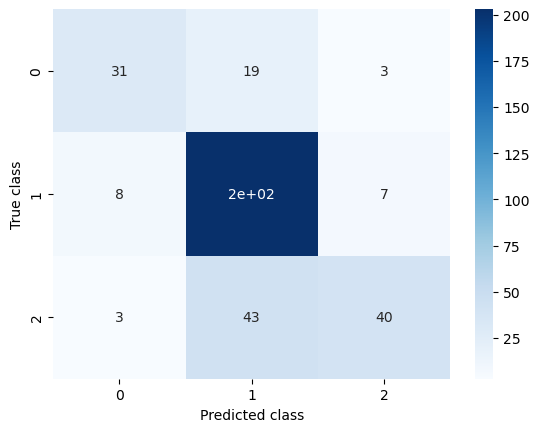

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.58      0.65        53
         1.0       0.77      0.93      0.84       218
         2.0       0.80      0.47      0.59        86

    accuracy                           0.77       357
   macro avg       0.77      0.66      0.69       357
weighted avg       0.77      0.77      0.75       357



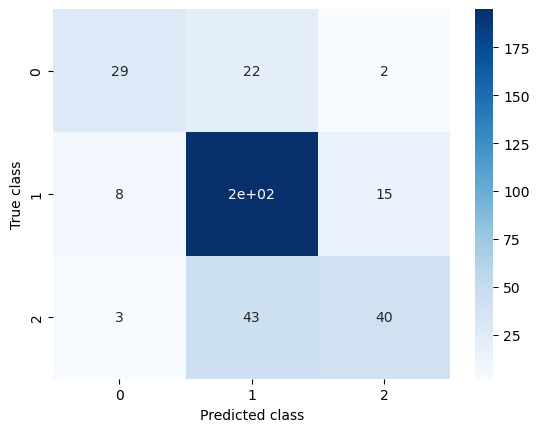

Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.55      0.62        53
         1.0       0.75      0.89      0.82       218
         2.0       0.70      0.47      0.56        86

    accuracy                           0.74       357
   macro avg       0.73      0.64      0.67       357
weighted avg       0.73      0.74      0.73       357



In [114]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Define the function to train the models and output confusion matrix and classification report
def train_and_evaluate(X_train, y_train, X_test, y_test, model):
    # Train the model
    trained_model = model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = trained_model.predict(X_test)

    # Compute the accuracy, confusion matrix and classification report
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Plot the confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, cmap="Blues")
    plt.xlabel("Predicted class")
    plt.ylabel("True class")
    plt.show()

    # Print the classification report
    print("Classification Report:")
    print(class_report)

    return trained_model, accuracy, cm, class_report


# Train and evaluate the xgboost model
xgb_model, xgb_accuracy, xgb_conf_matrix, xgb_class_report = train_and_evaluate(X_train, y_train, X_test, y_test, XGBClassifier
                                                                                (subsample = 0.55, n_estimators = 60, min_child_weight = 2, 
                                                                                 max_depth = 8, learning_rate = 0.04, colsample_bytree = 0.8000000000000003
                                                                                ))

xgb_model, xgb_accuracy, xgb_conf_matrix, xgb_class_report = train_and_evaluate(X_train, y_train, X_test, y_test, XGBClassifier
                                                                                ())

# Train and evaluate the gradient boosting model
#gb_model, gb_accuracy, gb_conf_matrix, gb_class_report = train_and_evaluate(X_train, y_train, X_test, y_test, GradientBoostingClassifier
                                                                            #(subsample = 0.6, n_estimators=80, min_samples_split=9, min_samples_leaf= 1, 
                                                                             #max_features = None, max_depth= 3, learning_rate= 0.03, random_state=42))

# Train and evaluate the SVM
#svm_model, svm_accuracy, svm_conf_matrix, svm_class_report = train_and_evaluate(X_train, y_train, X_test, y_test, 
                                                                                #SVC(kernel='rbf'))

# Train and evaluate the random forest model
#rf_model, rf_accuracy, rf_conf_matrix, rf_class_report = train_and_evaluate(X_train, y_train, X_test, y_test, RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42))

S468 0.06128397211432457
C408 0.043052300810813904
S469 0.037385378032922745
S431 0.033819954842329025
E525 0.024152414873242378
E602 0.022495217621326447
S467 0.021541602909564972
E427 0.020787963643670082
L620 0.020539868623018265
E411 0.02019784040749073
C102 0.0198983121663332
C180 0.019643964245915413
E514 0.01872936263680458
Z977 0.01865106262266636
L623 0.016664359718561172
H129 0.016571344807744026
X402 0.016308816149830818
C107 0.016041040420532227
E403 0.016020692884922028
S463 0.01587136834859848
S465 0.015462962910532951
C104 0.015060610137879848
C401 0.014701874926686287
B903 0.014230198226869106
S464 0.013815412297844887
C120 0.013620592653751373
H102 0.013586834073066711
C203 0.012992443516850471
X106 0.01273647416383028
L622 0.01268311683088541
C116 0.012407658621668816
E406 0.012203043326735497
E512 0.012189510278403759
C103 0.012139064259827137
C153 0.012079564854502678
C409 0.01197145413607359
C121 0.01187106966972351
T103 0.011790679767727852
S529 0.0117832105606794

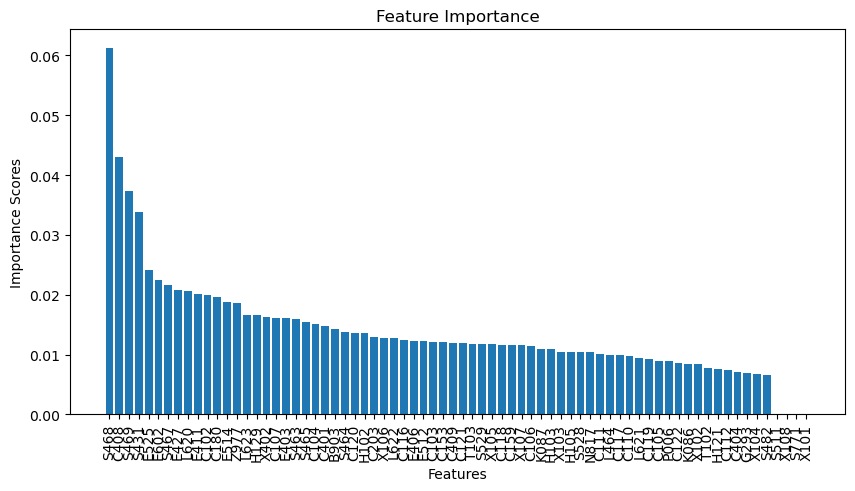

In [115]:
from sklearn.datasets import make_classification

# Get the feature importances
importances = xgb_model.feature_importances_
    
# Create a dataframe of feature names and importance scores
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the dataframe by importance score, from high to low
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Output the feature names and importance scores
for index, row in feature_importances.iterrows():
    print(row['feature'], row['importance'])

# Create a bar plot of feature importance scores
plt.figure(figsize=(10,5))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.title('Feature Importance')
plt.show()

In [16]:
import xgboost as xgb

# 특성 중요도 
importances = xgb_model.feature_importances_
importances

array([0.01034867, 0.01179068, 0.01091086, 0.01273647, 0.01171311,
       0.00884554, 0.01044786, 0.00667473, 0.00839346, 0.00777264,
       0.01178321, 0.01036232, 0.        , 0.        , 0.        ,
       0.        , 0.0430523 , 0.01381541, 0.01587137, 0.01546296,
       0.03738538, 0.01218951, 0.01197145, 0.02415241, 0.02249522,
       0.00657104, 0.0215416 , 0.01872936, 0.06128397, 0.03381995,
       0.02019784, 0.01630882, 0.00690575, 0.0142302 , 0.0104255 ,
       0.00755915, 0.01989831, 0.00981818, 0.01506061, 0.01167321,
       0.01470187, 0.01865106, 0.02078796, 0.01157877, 0.00898475,
       0.01141052, 0.01604104, 0.01213906, 0.00996097, 0.01240766,
       0.01009653, 0.00735568, 0.00920769, 0.01362059, 0.01187107,
       0.00855085, 0.01220304, 0.01602069, 0.01207956, 0.01100328,
       0.00842672, 0.00705263, 0.00996324, 0.01657134, 0.01299244,
       0.01358683, 0.01964396, 0.01164451, 0.02053987, 0.00935912,
       0.01268312, 0.01666436], dtype=float32)

In [32]:
X

,N817,T103,H103,X106,X105,P006,X103,X104,X102,T102,...,L464,H129,C203,H102,C180,C159,L620,L621,L622,L623
0,358.419705,2359.84,6860.0,0.7,0.7,1.710000,34.4,3.6,60.6,4157.16,...,25.000000,325.450617,10.277011,4.66,102.298817,85.343612,1024.17,599.40,167.944515,131.844893
1,358.419705,1062.89,6770.0,0.1,0.0,2.170000,15.7,5.5,78.7,5327.99,...,19.600000,325.450617,10.277011,4.92,102.298817,85.343612,426.22,196.63,167.944515,131.844893
2,430.700000,1773.36,8210.0,0.4,7.3,2.780000,21.6,6.7,64.0,5254.40,...,10.100000,325.450617,4.900000,4.86,102.298817,78.000000,897.32,322.75,167.944515,131.844893
3,358.419705,2389.20,7240.0,0.6,3.9,3.280000,33.0,9.9,52.6,3808.24,...,13.022909,325.450617,10.277011,4.90,102.298817,85.343612,1134.87,346.43,167.944515,131.844893
4,358.419705,1716.81,6430.0,0.3,3.3,2.280000,26.7,8.2,61.5,3954.45,...,13.022909,325.450617,10.277011,3.99,102.298817,85.343612,743.38,326.19,167.944515,131.844893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,40.000000,2910.57,6630.0,0.5,3.5,1.778964,43.9,10.7,41.4,2744.82,...,6.300000,356.000000,10.200000,4.30,93.000000,141.000000,2018.00,453.00,179.000000,86.000000
1780,40.000000,1928.50,4750.0,0.8,5.3,1.778964,40.6,7.2,46.1,2189.75,...,15.100000,260.000000,10.700000,3.79,90.000000,106.000000,911.00,591.00,112.000000,197.000000
1781,40.000000,1792.92,6690.0,1.0,21.4,1.778964,26.8,5.4,45.4,3037.26,...,11.000000,269.000000,16.800000,4.13,95.000000,22.000000,825.00,515.00,205.000000,138.000000
1782,40.000000,1892.02,4940.0,0.4,0.6,1.778964,38.3,6.9,53.8,2657.72,...,20.100000,455.000000,9.800000,4.24,86.000000,42.000000,828.00,527.00,237.000000,198.000000


              precision    recall  f1-score   support

         0.0       0.71      0.55      0.62        53
         1.0       0.75      0.89      0.81       218
         2.0       0.70      0.49      0.58        86

    accuracy                           0.74       357
   macro avg       0.72      0.64      0.67       357
weighted avg       0.73      0.74      0.73       357



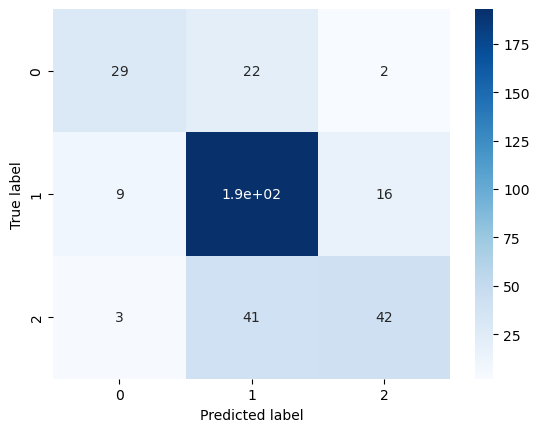

In [136]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import xgboost as xgb


# feature 선택
selected_features = ['H103', 'X106', 'X105', 'X103', 'X104', 'X102', 'T102', 'L620', 'L621',
       'T103', 'L622', 'L623', 'P006', 'N817', 'C408', 'E512', 'S469', 'H105',
       'H121', 'C102', 'C110', 'C104', 'C119', 'C120', 'C121', 'C122', 'C401',
       'E406', 'E403', 'Z977', 'C153', 'K087', 'K086', 'E427', 'C404', 'L464']

remaining_features = list(set(X.columns) - set(selected_features))

# 선택된 feature의 가중치 설정
feature_weights = {'H103': 2, 'X106': 2, 'X105': 2, 'X103': 2, 'X104': 2, 'X102': 2, 
                   'T102': 3, 'L620': 3, 'L621': 3, 'T103': 3, 'L622': 3, 'L623': 3, 
                   'P006': 1.5, 'N817': 1.5, 'C408': 1.5, 'E512': 1.5, 'S469': 1.5, 'H105': 1.5,
                   'H121': 1.5, 'C102': 1.5, 'C110': 1.5, 'C104': 1.5, 'C119': 1.5, 'C120': 1.5, 
                   'C121': 1.5, 'C122': 1.5, 'C401': 1.5,'E406': 1.5, 'E403': 1.5, 'Z977': 1.5, 
                   'C153': 1.5, 'K087': 1.5, 'K086': 1.5, 'E427': 1.5, 'C404': 1.5, 'L464': 1.5}

# 선택된 feature들의 데이터만 추출
X_weighted = df[selected_features_with_weight].copy()

# 가중치 부여
for feature in feature_weights.keys():
    X_weighted[feature] = X_weighted[feature] * feature_weights[feature]

    
    
# 선택되지 않은 feature들의 데이터만 추출
X_unweighted = df[remaining_features]

# 선택된 feature들과 선택되지 않은 feature들을 합치기
X = pd.concat([X_weighted, X_unweighted], axis=1)

# 클래스 라벨 추출
y = df["annotation_result"]

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 생성
model = xgb.XGBClassifier(objective="multi:softmax", num_class=3)

# 모델 훈련
model.fit(X_train, y_train)

# 예측 결과 출력
y_pred = model.predict(X_test)

# classification report 출력
print(classification_report(y_test, y_pred))

# confusion matrix 출력
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()